## Các giả định về Mô hình Tuyến tính

Một số giả định của mô hình hồi quy tuyến tính là:

- **Độ tuyến tính (Linearity)**: Các giá trị trung bình của biến kết quả với mỗi gia số của (các) yếu tố dự đoán nằm dọc theo một đường thẳng hay có một mối quan hệ tuyến tính giữa các yếu tố dự báo và mục tiêu.

- **Không có đa cộng tuyến hoàn hảo**: Không tồn tại mối quan hệ tuyến tính hoàn hảo giữa hai hoặc nhiều yếu tố dự báo.

- **Lỗi phân phối chuẩn**: các phần dư được phân phối chuẩn ngẫu nhiên với giá trị trung bình bằng 0.

- **Phương sai không đổi (Homoscedasticity)**: Ở từng mức độ của (các) biến dự báo, phương sai của các phần tử dư không đổi.

Ví dụ về mô hình tuyến tính:

- Hồi quy tuyến tính và hồi quy Logistic
- Phân tích phân biệt tuyến tính (LDA)


**Không đáp ứng một hoặc nhiều giả định về mô hình có thể dẫn đến chất lượng mô hình kém**. Việc không đáp ứng một hoặc nhiều giả định về mô hình có thể dẫn đến chất lượng mô hình kém. Nói cách khác, các biến không dự đoán chính xác kết quả với một mô hình tuyến tính.

Nếu các giả định không được đáp ứng, chúng ta sẽ:

- sử dụng mô hình phi tuyến tính khác để dự đoán kết quả từ các biến
- biến đổi các biến đầu vào để chúng đáp ứng các giả định.


### Xác định xem mô hình tuyến tính có chính xác không

Chẩn đoán chính để xác định xem mô hình tuyến tính có hoạt động tốt để dự đoán kết quả từ các yếu tố dự đoán hay không là đánh giá ngay từ đầu xem các số hạng lỗi hoặc phần dư tuân liệu có theo phân phối chuẩn với giá trị trung bình bằng 0 và có phương sai không đổi. Nếu đúng, chúng ta có thể khá tự tin rằng mô hình đang hoạt động tốt.

Chúng ta có thể xác định phân phối chuẩn và phương sai không đổi như sau:

- Phân phối chuẩn có thể được đánh giá bằng biểu đồ Q-Q.
- Phương sai không đổi có thể được đánh giá bằng các biểu đồ phần dư.


Chúng ta cũng cần kiểm tra các giả định khác:

- Hồi quy tuyến tính có thể được đánh giá bằng biểu đồ phân tán và biểu đồ phần dư
- Đa cộng tuyến có thể được đánh giá bằng ma trận tương quan


### Nếu các giả định được đáp ứng:

Đôi khi phép biến đổi về biến có thể giúp các biến đáp ứng các giả định của mô hình. Chúng ta thường làm 1 trong 2 điều:

- Biến đổi toán học của biến.
- Rời rạc hóa (Discretisation).


**Chúng ta sẽ đề cập biến đổi toán học và rời rạc hóa sau**.


## Trong mô phỏng này...

Chúng ta sẽ:

- Huấn luyện mô hình tuyến tính để dự đoán mục tiêu từ 3 biến dự đoán.
- Đánh giá xem liệu mô hình có chính xác không bằng cách kiểm tra phần dư.
- Xác định xem phần dư có được phân phối chuẩn không.
- Liệu có phương sai không đổi?
- Sau đó biến đổi dữ liệu và xem điều này cải thiện chất lượng mô hình thế nào.
- Chuyển sang kiểm tra Tương quan và quan hệ tuyến tính giữa biến và kết quả.

In [1]:
import pandas as pd
import numpy as np

# để vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# cho biểu đồ Q-Q
import scipy.stats as stats

# tập dữ liệu cho bản mô phỏng
#from sklearn.datasets import load_boston

# cho hồi quy tuyến tính
from sklearn.linear_model import LinearRegression

# chia và chuẩn hóa tập dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# đánh giá mô hình hồi quy
from sklearn.metrics import mean_squared_error

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
name = ['CRIM',	'ZN',	'INDUS',	'CHAS','NOX',	'RM',	'AGE',	'DIS',	'RAD'	,'TAX',	'PTRATIO',	'B',	'LSTAT']
boston = pd.DataFrame(data, columns=name)
boston['MEDV'] = target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
#========================= Kiểu boston này cx ko được hỗ trợ nữa

# load dữ liệu giá nhà ở Boston

# cách chúng ta load tập dữ liệu boston từ sklearn
boston_dataset = load_boston()

# tạo dataframe với các biến độc lập
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# thêm target
boston['MEDV'] = boston_dataset.target

boston.head()

NameError: ignored

In [ ]:
# đây là thông tin về tập dữ liệu giá nhà boston

# trong trường hợp các bạn muốn làm quen với các biến trước
# tiếp tục với notebook

# mục tiêu là dự đoán "Median house value (price)"
# cột MEDV của tập dữ liệu này

# và chúng ta có các biến với các đặc điểm của nó
# các gia đình và hàng xóm

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Xây dựng mô hình tuyến tính

In [5]:
# để huấn luyện và đánh giá mô hình, trước tiên hãy chia thành
# tập huấn luyện, tập kiểm tra sử dụng 3 biến được chọn:
# LSTAT, RM và CRIM

# hãy chia thành tập huấn luyện và tập kiểm tra
# sử dụng hàm của slklearn dưới đây
## Yêu cầu
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [6]:
## Yêu cầu 1: co giãn quy trình chuẩn đặc trung cho mô hình tuyến tính
# sẽ được giải thích sau trong khóa
## VIẾT CODE Ở ĐÂY:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

<details><summary> Gợi ý </summary>

[StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

</details>

In [7]:
## Yêu cầu 2: hãy xây một mô hình tuyến tính sử dụng dũ liệu đã load từ sklearn

# khởi tạo mô hình tuyến tính
## VIẾT CODE Ở ĐÂY:
linreg = LinearRegression()

# train the model huấn luyện mô hình
linreg.fit(scaler.transform(X_train), y_train)

# đưa ra dự đoán trong tập huấn luyện và tính
# sai số bình phương trung bình (MSE)
print('Train set')
## VIẾT CODE Ở ĐÂY:
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(pred, y_train)))

# đưa ra dự đoán trong tập kiểm tra và tính
# MSE
print('Test set')
## VIẾT CODE Ở ĐÂY:
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(pred, y_test)))
print()

Train set
Linear Regression mse: 28.603232128198886
Test set
Linear Regression mse: 33.20006295308441



<details><summary> Gợi ý </summary>

[LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

</details>

## Tính phần dư

In [8]:
## Yêu cầu 3: tính phần dư
## VIẾT CODE Ở ĐÂY:
error = y_test - pred

## Kiểm tra tính chuẩn tắc phần dư

(array([ 1.,  2.,  1.,  2.,  5., 14., 20., 22., 14., 23., 15.,  7.,  4.,
         7.,  3.,  3.,  3.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([-12.30549134, -10.95191084,  -9.59833034,  -8.24474984,
         -6.89116933,  -5.53758883,  -4.18400833,  -2.83042783,
         -1.47684733,  -0.12326683,   1.23031367,   2.58389417,
          3.93747467,   5.29105517,   6.64463567,   7.99821617,
          9.35179667,  10.70537717,  12.05895767,  13.41253817,
         14.76611867,  16.11969917,  17.47327967,  18.82686017,
         20.18044067,  21.53402117,  22.88760167,  24.24118217,
         25.59476267,  26.94834318,  28.30192368]),
 <BarContainer object of 30 artists>)

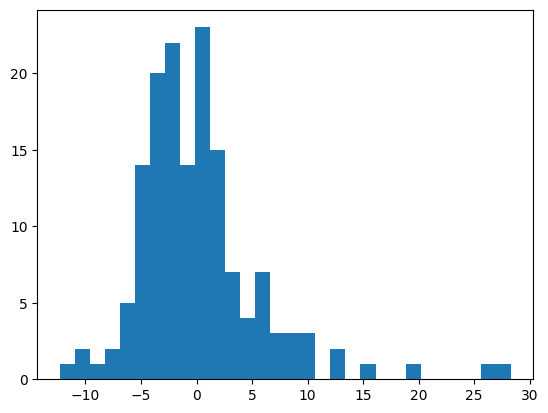

In [9]:
## Yêu cầu 4: chúng ta sẽ tạo biểu đồ từ seaborn để xác định xem phần dư có:
# được phân phối chuẩn với giá trị mean tại 0
## VIẾT CODE Ở ĐÂY:
plt.hist(error, bins=30)

<details><summary> Gợi ý </summary>

[histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

</details>

Chúng ta thấy rằng các phần dư hiển thị một phân phối khá chuẩn căn ở 0. Không hoàn hảo, bằng mắt thường có thể thấy hơi lệch về phía bên trái, với một số giá trị bất thường cao hơn về phía bên phải của phân phối.

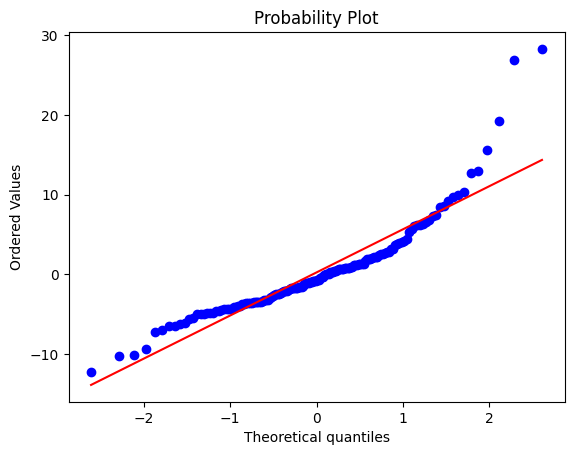

In [10]:
## Yêu cầu 5: có thể trực quan hóa tốt hơn phân phối phần dư với
# biểu đồ Q-Q. Nếu các phần dư được phân phối chuẩn
# các chấm sẽ điều chỉnh thành đường tạo góc 45 độ

## VIẾT CODE Ở ĐÂY:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

<details><summary> Gợi ý</summary>

[probplot()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

</details>

Từ biểu đồ Q-Q, chúng ta dễ dàng thấy cách phần dư lệch khỏi đường màu đỏ về phía cuối của phân phối, do đó chúng không được phân phối chuẩn.

## Phương sai không đổi

Phương sai không đổi ngụ ý rằng ở mỗi mức của (các) biến dự báo, phương sai của các số hạng dư cũng không đổi. Vì vậy, chúng ta cần vẽ biểu đồ phần dư với các biến.

Phương sai không đổi còn được gọi là tính đồng nhất của phương sai, mô tả tình huống mà phần sai số, là “nhiễu” hoặc xáo trộn ngẫu nhiên trong mối quan hệ giữa các biến độc lập X và biến phụ thuộc Y, giống nhau trên tất cả các biến độc lập.

Cách xác định xem các biến có phương sai không đổi hay không là tạo một mô hình tuyến tính với tất cả các biến độc lập có liên quan, tính phần dư và vẽ biểu đồ phần dư với từng biến độc lập. Nếu phân phối của phần dư đồng nhất trên các giá trị biến thì các biến có phương sai không đổi.

Các kiểm định phương sai không đổi khác :

- Biểu đồ phần dư (Residuals plot)
- Kiểm định Levene
- Kiểm định Barlett
- Kiểm định Goldfeld-Quandt

Với với bản mô phỏng này, chúng ta sẽ tập trung vào phân tích biểu đồ phần dư.

Text(0, 0.5, 'Residuals')

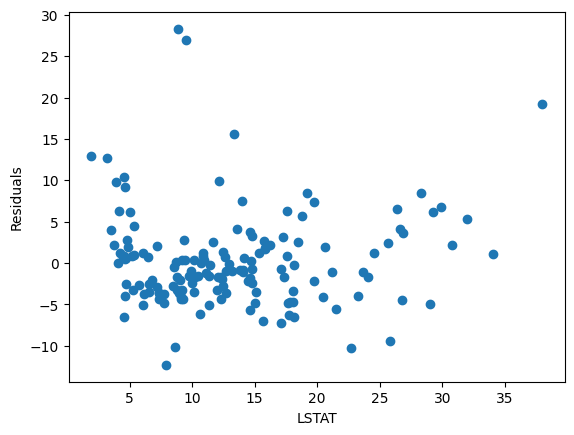

In [11]:
## Yêu cầu 6: vẽ biểu đồ phần dư với một biến độc lập
# các biến LSTAT

## VIẾT CODE Ở ĐÂY:
plt.scatter(X_test['LSTAT'], error)
plt.xlabel("LSTAT")
plt.ylabel("Residuals")

<details><summary> Gợi ý </summary>

[scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

</details>

Các phần dư có vẻ được phân phối khá đồng nhất trên các giá trị của LSTAT.

Text(0, 0.5, 'Residulas')

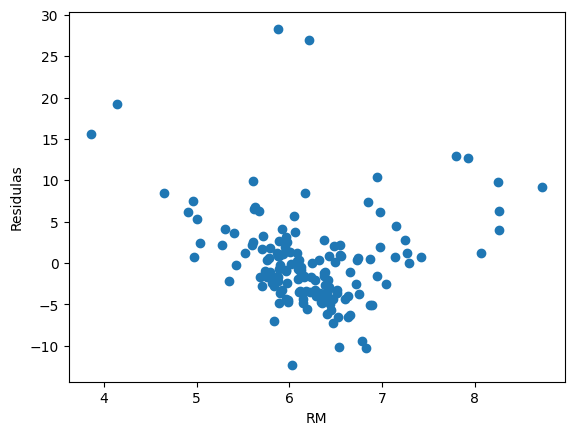

In [12]:
## Yêu cầu 7: hãy vẽ biểu đồ phần dư với RM

## VIẾT CODE Ở ĐÂY:
plt.scatter(X_test['RM'], error)
plt.xlabel("RM")
plt.ylabel("Residulas")

Với biến này, phần dư dường như không được phân phối đồng nhất trên các giá trị của RM. Trên thực tế, các giá trị cao và thấp của RM cho thấy các phần sai số lớn hơn.

Text(0, 0.5, 'Residuals')

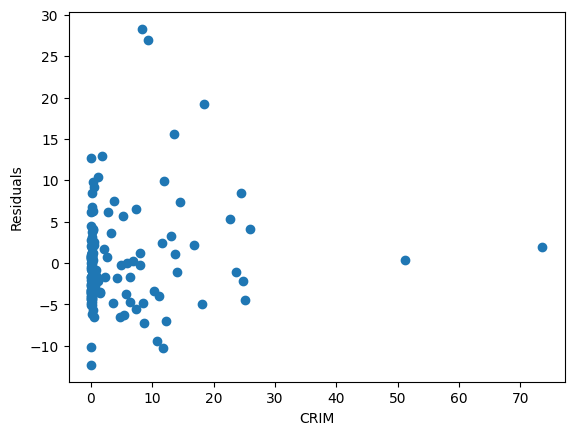

In [13]:
## Yêu cầu 8: vẽ biểu đồ phần dư với một biến độc lập
# biến CRIM

## VIẾT CODE Ở ĐÂY:
plt.scatter(X_test['CRIM'], error)
plt.xlabel("CRIM")
plt.ylabel("Residuals")

Hầu hết các giá trị của CRIM đều bị lệch về phía bên trái, vì vậy khó có thể nói liệu phần dư có hiển thị cùng một phương sai cho tất cả các giá trị của CRIM hay không, vì chúng ta có rất ít điểm dữ liệu cho CRIM khi giá trị của nó lớn.

## Phân tích phần dư tự động với Yellowbrick

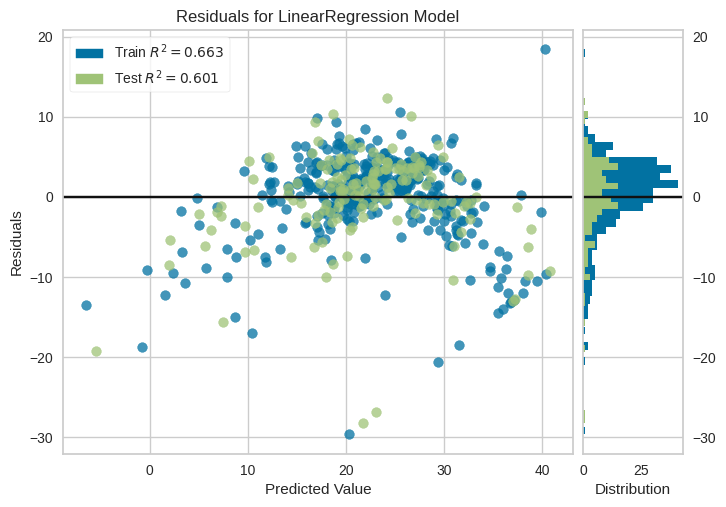

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# trong cell này, chúng ta sẽ đưa yellowbrick vào sử dụng
# thư viện trực quan hóa của mô hình học máy
# chất lượng

# nếu chưa cài yellowbrick, hãy comment
# cell này nhằm tránh lỗi khi đang chạy notebook

# yellowbrick cho phép trực quan hóa phần dư của
# mô hình sau khi khớp hồi quy tuyến tính

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Khớp dữ liệu huấn luyện với mô hình
visualizer.score(scaler.transform(X_test), y_test)  # Đánh giá mô hình trong dữ liệu kiểm tra
visualizer.poof()

Ở bên phải, chúng ta có phân bố của phần dư trong tập huấn luyện và tập kiểm tra và thấy rằng nó không hoàn toàn căn giữa ở 0.


Ở bên trái, chúng ta có phần dư với giá trị dự đoán và thấy rằng phương sai thay đổi. Về phía cực trị của các dự đoán, mô hình ước tính thấp kết quả (hầu hết phần dư âm). Và về phía tâm các dự đoán, mô hình ước tính quá mức kết quả. Vì vậy, phương sai phần dư thay đổi với tất cả các giá trị.

## Biến đổi dữ liệu để cải thiện khớp mô hình

Chúng ta sẽ sử dụng phép biến đổi box-cox.

In [15]:
import scipy.stats as stats

# áp dụng phép biến đổi box-cox cho các biến
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# hãy chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [16]:
# hãy co giãn các đặc trưng

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
# xây dựng mô hình mới sử dụng các biến đã biến đổi

# chỉ định mô hình
linreg = LinearRegression()

# khớp mô hình
linreg.fit(scaler.transform(X_train), y_train)

# dự đoán và tính bình phương trung bình
# lỗi trên tập huấn luyện
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# dự đoán và tính bình phương trung bình
# lỗi trên tập kiểm tra
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



### Tính phần dư

In [18]:
# tính phần dư

error = y_test - pred

### Tính chuấn tắc phần dư

<Axes: xlabel='MEDV', ylabel='Count'>

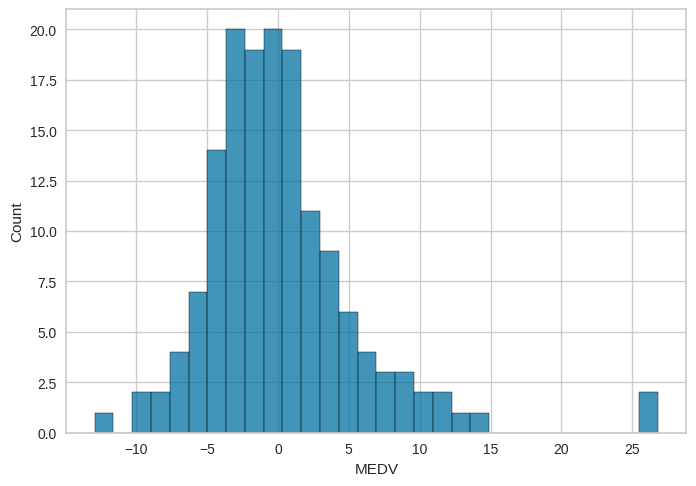

In [19]:
# tạo biểu đồ để xác định xem phần dư
# có được phân phối chuẩn với giá trị trung bình ở 0

sns.histplot(error, bins=30)

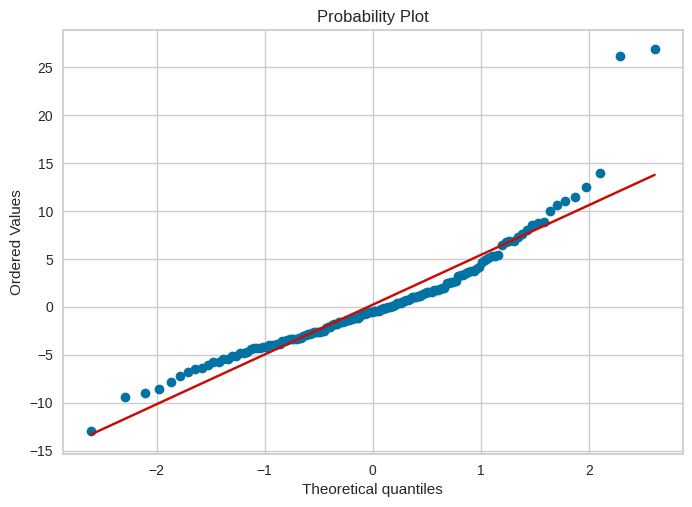

In [20]:
# có thể trực quan hóa phân phối phần dư tốt hơn
# biểu đồ Q-Q. Nếu phần dư được phân phối chuẩn
# các chấm được điều chỉnh thành đường tạo góc 45 độ

stats.probplot(error, dist="norm", plot=plt)
plt.show()

Có cải thiện: phần dư được phân phối chuẩn "hơn"

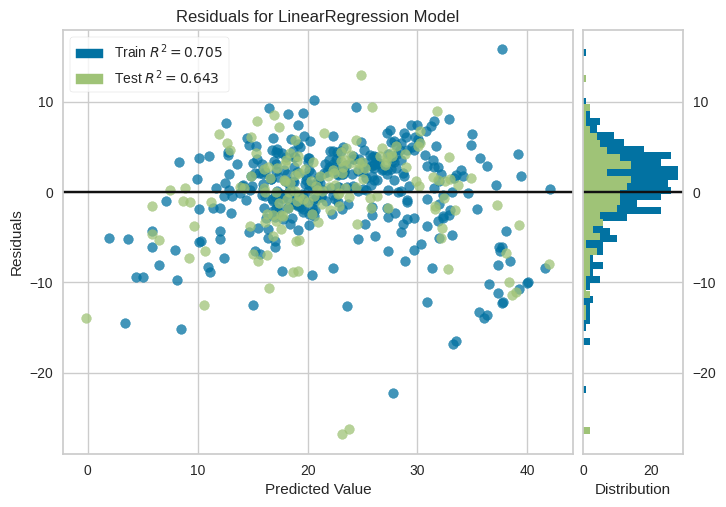

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
# hãy thực hiện phân tích với yellowbrick

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Khớp dữ liệu huấn luyện với mô hình
visualizer.score(scaler.transform(X_test), y_test)  # Đánh giá mô hình trong dữ liệu kiểm tra
visualizer.poof()

Chúng ta thấy có cải thiện đáng kể trong phân phối của phần dư, giờ căn chuẩn hươn ở 0 với phương sai đồng đều hơn trên các giá trị của dự đoán.



IndexError: ignored

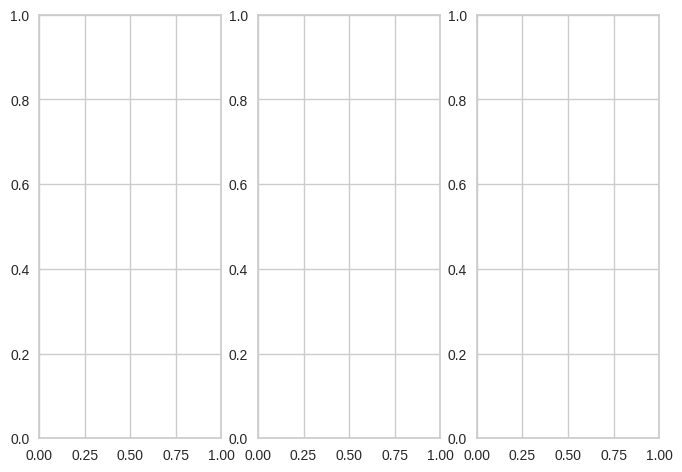

In [42]:
## Yêu cầu 9: Vẽ biểu đồ phần dư với các biến đã biến đổi để xác định phương sai không đổi.         #================> ko vex dd, dang loi

# **LƯU Ý**
# Chất lượng mô hình cũng được cải thiện hơn nếu chúng ta biến đổi mục tiêu.
figure, axis = plt.subplots(1,3)
axis[0,0].scatter(X_test['CRIM'].values, error)
axis[0,0].xlabel("SCRIM")
axis[0,0].ylabel("Residuals")
axis[0,0].title("SCRIM")

axis[0,1].scatter(X_test['LSTAT'].values, error)
axis[0,1].xlabel("LSTAT")
axis[0,1].ylabel("Residuals")
axis[0,1].title("LSTAT")

axis[0,2].scatter(X_test['RM'].values, error)
axis[0,2].xlabel("RM")
axis[0,2].ylabel("Residuals")
axis[0,2].title("RM")

plt.show()

Text(0.5, 1.0, 'SCRIM')

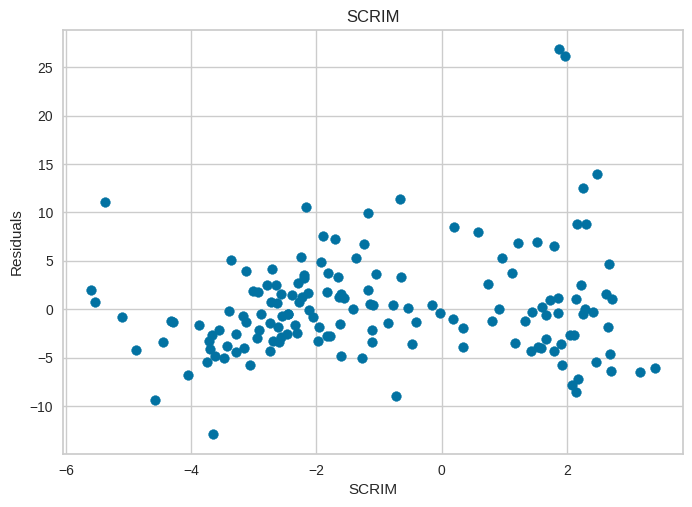

In [22]:
plt.scatter(X_test['CRIM'],error)
plt.xlabel("SCRIM")
plt.ylabel("Residuals")
plt.title("SCRIM")

Text(0.5, 1.0, 'LSTAT')

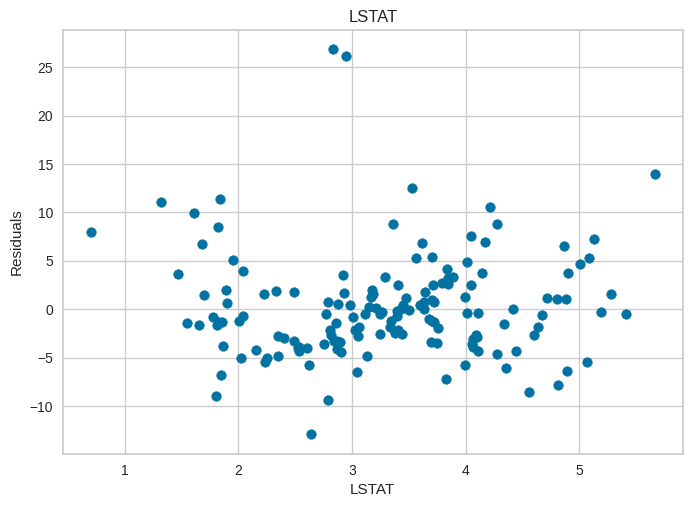

In [23]:
plt.scatter(X_test['LSTAT'],error)
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.title("LSTAT")

Text(0.5, 1.0, 'RM')

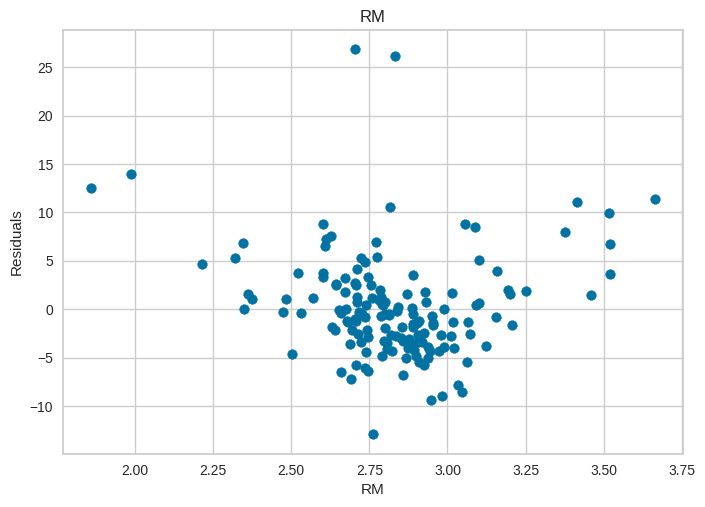

In [24]:
plt.scatter(X_test['RM'],error)
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.title("RM")

## Kiểm tra các giả định khác

Nếu có thời gian và muốn hiểu rõ hơn mối quan hệ giữa các biến và kết quả, chúng ta có thể kiểm tra quan hệ tuyến tính và đa cộng tuyến.

In [25]:
# tạo dataframe với biến x
# tuân theo phân phối chuẩn và thể hiện
# quan hệ tuyến tính với y

# điều này cung cấp biểu đồ đã dự tính
# chẳng hạn: biểu đồ trông thế nào nếu
# giả định được đáp ứng

np.random.seed(29) # để tái lặp

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Quan hệ tuyến tính

Chúng ta đánh giá giả định tuyến tính với biểu đồ phân tán và biểu đồ phần dư. Biểu đồ phân tán phác họa thay đổi trong biến phụ thuộc y với biến độc lập x.

### Biểu đồ phân tán

Text(0.5, 31.999999999999986, 'Independent variable')

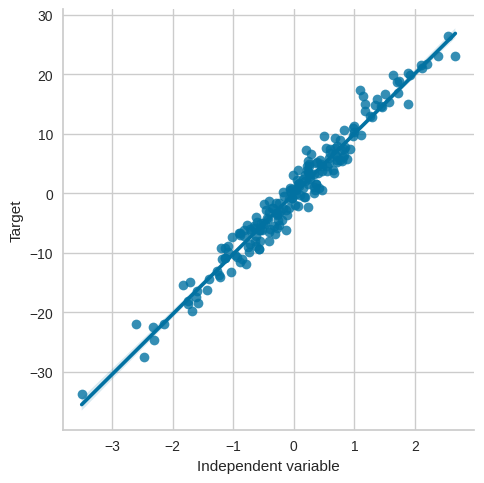

In [26]:
# với dữ liệu mô phỏng

# biểu đồ trông như vậy khi
# có mối quan hệ tuyến tính

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order=1 thể hiện chúng ta muốn seaborn
# ước tính mô hình tuyến tính (đường trong đồ thị bên dưới)
# giữa x và y

plt.ylabel('Target')
plt.xlabel('Independent variable')

Text(0.5, 31.999999999999986, 'LSTAT')

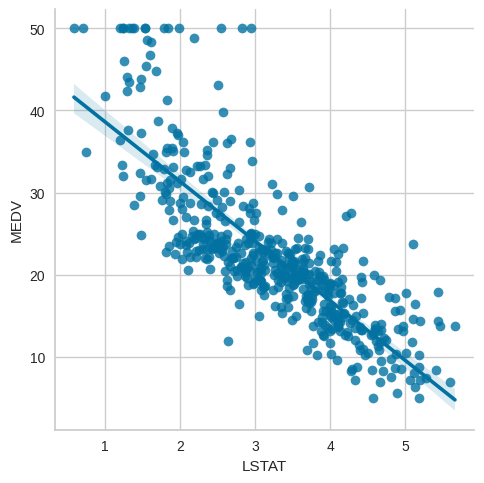

In [27]:
## Yêu cầu 10: now we make a scatter plot for the boston tạo biểu đồ phân tán cho
# house price dataset tập dữ liệu giá nhà boston

# (chúng ta đã biến đổi các biến)

# vẽ biểu đồ LAST (% tình trạng của tập hợp)
# với MEDV (giá trị trung bình của ngôi nhà)

## VIẾT CODE Ở ĐÂY:
sns.lmplot(x='LSTAT', y='MEDV', data=boston, order=1)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')

<details><summary> Gợi ý </summary>

[lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

</details>

Mối quan hệ giữa LSTAT và MEDV khá tuyến tính, ngoại trừ một số giá trị xung quanh các giá trị tối thiểu của LSTAT về phía trên cùng bên trái của biểu đồ.

Text(0.5, 31.999999999999986, 'RM')

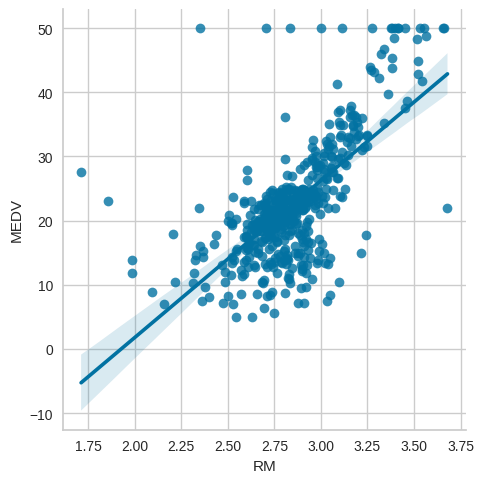

In [28]:
## Yêu cầu 11: vẽ biểu đồ RM (trung bình số phòng trên một ngôi nhà)
# với MEDV (giá trị trung bình của ngôi nhà)

## VIẾT CODE Ở ĐÂY:
sns.lmplot(x = 'RM', y='MEDV', data=boston, order=1)
plt.ylabel('MEDV')
plt.xlabel('RM')

Mối quan hệ giữa mục tiêu và RM được biến đổi không quá tuyến tính. Chúng ta có thể xem xét biến đổi thêm biến này, loại bỏ biến khỏi mô hình hoặc sử dụng mô hình phi tuyến tính để dự đoán MEDV từ RM.

Text(0.5, 31.999999999999986, 'CRIM')

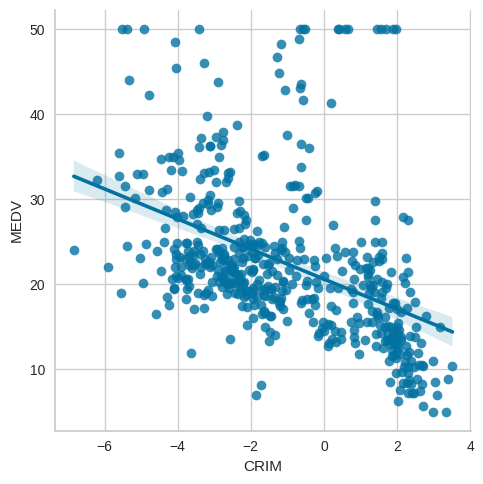

In [29]:
## Yêu cầu 12: vẽ biểu đồ CRIM (tỷ lệ tội phạm bình quân theo thị trấn)
# với MEDV (giá trị trung bình của ngôi nhà)

## VIẾT CODE Ở ĐÂY:


Mối quan hệ giữa CRIM và MEDV cũng không hoàn toàn tuyến tính.



In [ ]:
## Yêu cầu 13: So sánh quan hệ ban đầu của LSTAT, RM và CRIM với mục tiêu.
# Mặc dù quan hệ sau khi biến đổi không hoàn toàn tuyến tính nhưng nó vẫn đi theo hướng đó một chút sau khi biến đổi.

### biểu đồ phần dư (lỗi)

Chúng ta có thể xác định xem liệu có mối quan hệ tuyến tính giữa biến và mục tiêu hay không để đánh giá phân phối của lỗi hoặc phần dư. Phần dư đề cập đến sự khác biệt giữa các dự đoán và giá trị thực của mục tiêu. Thực hiện như sau:

1) tạo mô hình hồi quy tuyến tính bằng cách sử dụng các biến mong muốn (X)

2) có được các dự đoán

3) xác định lỗi (Giá nhà thật - giá nhà dự đoán)

4) quan sát phân bố của lỗi.

Nếu giá nhà trong trường hợp của MEDV được giải thích cách tuyến tính bởi các biến mà chúng ta đang đánh giá thì lỗi phải là nhiễu ngẫu nhiên và thường tuân theo phân phối chuẩn căn giữa ở 0. Chúng ta kỳ vọng sẽ thấy các phần sai số cho mỗi quan sát ở quanh 0.

Chúng ta sẽ thực hiện điều này trước cho dữ liệu mô phỏng để làm quen với cách các biểu đồ sẽ trông như thế nào. Sau đó, thực hiện tương tự với LSTAT rồi biến đổi LSTAT để xem phép biến đổi ảnh hưởng như thế nào đến phần dư và khớp tuyến tính.

**Lưu ý**

Điều này hơi phóng đại nếu chúng ta đang cố gắng dự đoán một kết quả từ các biến dự đoán. Tuy nhiên, có thể làm điều này để hiểu rõ hơn về mối quan hệ giữa các biến và mục tiêu.

Text(0, 0.5, 'Real value')

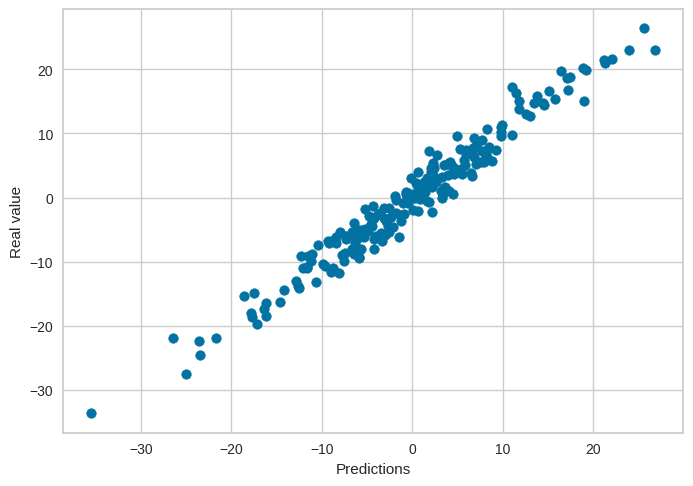

In [30]:
# DỮ LIỆU MÔ PHỎNG

# bước 1: tạo mô hình tuyến tính
# gọi mô hình tuyến tính từ sklearn
linreg = LinearRegression()

# khớp mô hình
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# bước 2: lấy dự đoán
# đưa ra các dự đoán
pred = linreg.predict(toy_df['x'].to_frame())

# bước 3: tính phần dư
error = toy_df['y'] - pred

# vẽ biểu đồ các giá trị dự đoán với giá trị thực
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Mô hình cho dự đoán tốt. Các dự đoán khá khớp với giá trị thực của mục tiêu.

Text(0.5, 0, 'Independent x')

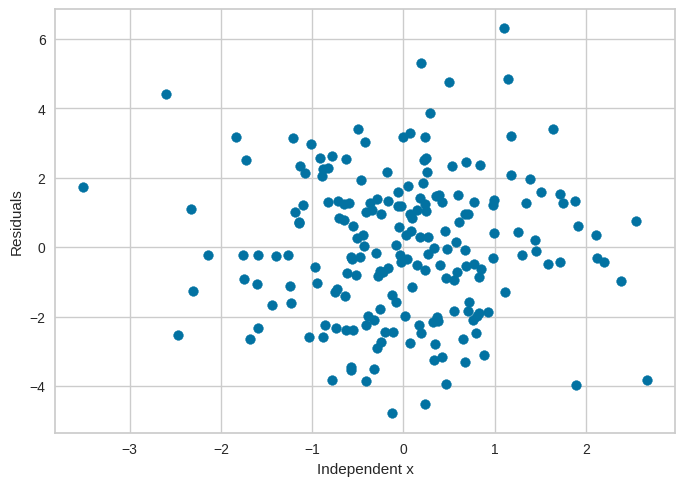

In [32]:
## Yêu cầu 14: bước 4: quan sát phân bố của lỗi

# Biểu đồ phần dư
# nếu quan hệ tuyến tính, nhiễu sẽ
# ngẫu nhiên, tập trung quanh 0 và tuân theo phân phối chuẩn

# vẽ biểu đồ phần dư của phần sai số với biến độc lập x
# các giá trị lỗi sẽ quanh 0 và được phân phối đồng đều

## VIẾT CODE Ở ĐÂY:
plt.scatter(y=error, x=toy_df['x'])
plt.ylabel("Residuals")
plt.xlabel("Independent x")

Các lỗi được phân phối quanh 0 như dự kiến.

Text(0.5, 0, 'Residuals')

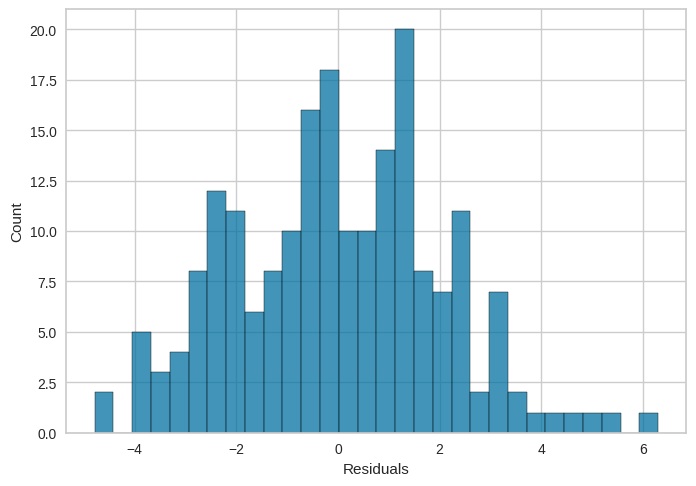

In [33]:
## Yêu cầu 15: bước 4: quan sát phân bố của lỗi

# vẽ biểu đồ tần suất của phần dư
# chúng tuân theo phân phối gauss
# tập trung quanh 0

## VIẾT CODE Ở ĐÂY:
sns.histplot(error, bins=30)
plt.xlabel("Residuals")

Các lỗi áp dụng phân phối Gauss và tập trung quanh 0. Do đó, nó đáp ứng các giả định như mong đợi.



In [ ]:
## Yêu cầu 16: Thực hiện tương tự với LSTAT (đã biến đổi biến này)

Text(0, 0.5, 'MEDV')

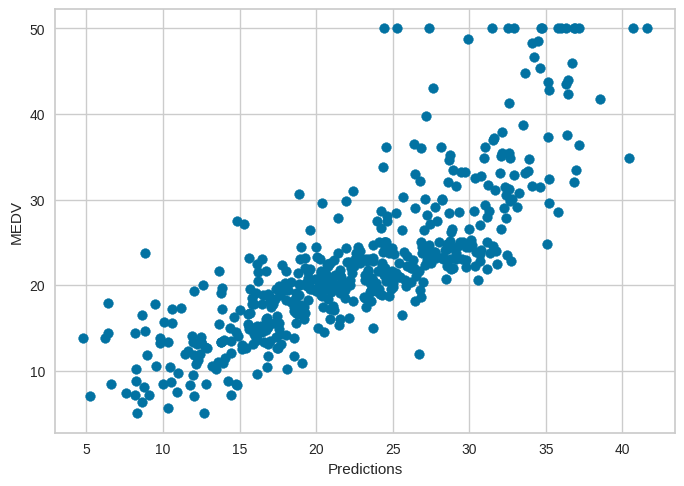

In [34]:

# gọi mô hình tuyến tính từ sklearn
linreg = LinearRegression()

# khớp mô hình
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# đưa ra dự đoán
pred = linreg.predict(boston['LSTAT'].to_frame())

# tính phần dư
error = boston['MEDV'] - pred

# vẽ biểu đồ các giá trị dự đoán với giá trị thực
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Hầu hết các dự đoán khớp khá tốt nhưng mô hình không dự đoán tốt lắm đối với giá nhà cao nhất. Đối với giá nhà cao, mô hình ước tính giá thấp hơn.

Text(0.5, 0, 'LSTAT')

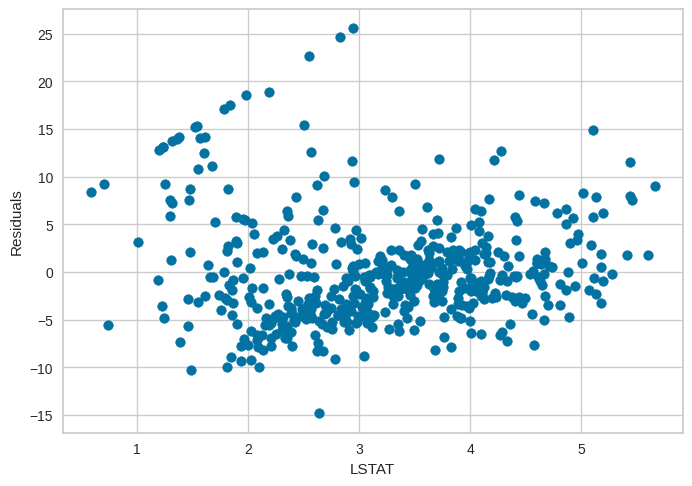

In [35]:
# Biểu đồ phần dư

# nếu quan hệ tuyến tính, nhiễu sẽ
# ngẫu nhiên, tập trung quanh 0 và tuân theo phân phối chuẩn

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

Các phần dư không thực sự tập trung quanh 0. Các lỗi không được phân phối đồng nhất trên các giá trị của LSTAT. Giá trị thấp và cao của LSTAT hiển thị lỗi cao hơn.

Mối quan hệ có thể được cải thiện.

<Axes: xlabel='MEDV', ylabel='Count'>

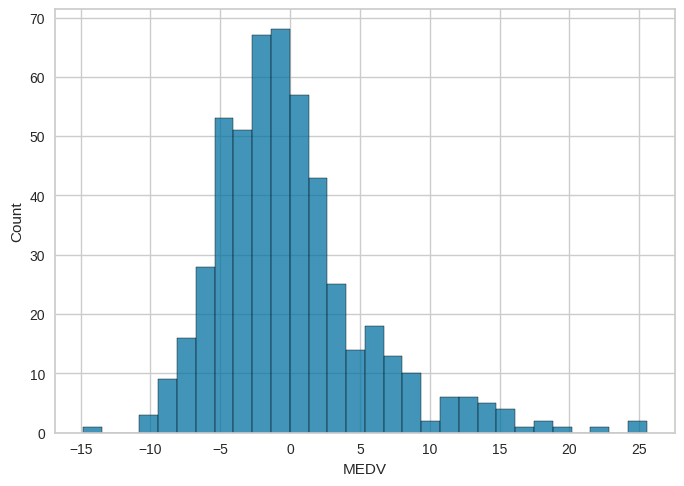

In [36]:
# vẽ biểu đồ tần suất của phần dư
# chúng tuân theo phân phối gauss
sns.histplot(error, bins=30)

Các phần dư không tập trung quanh 0 và phân phối cũng không hoàn toàn là phân phối Gauss.

## Đa cộng tuyến

Để xác định cộng tuyến, chúng ta xác định tương quan của tất cả các biến độc lập trong dataframe.

In [ ]:
# nắm bắt các đặc trưng trong một list #===================== ko chạy
features = boston_dataset.feature_names

<Axes: >

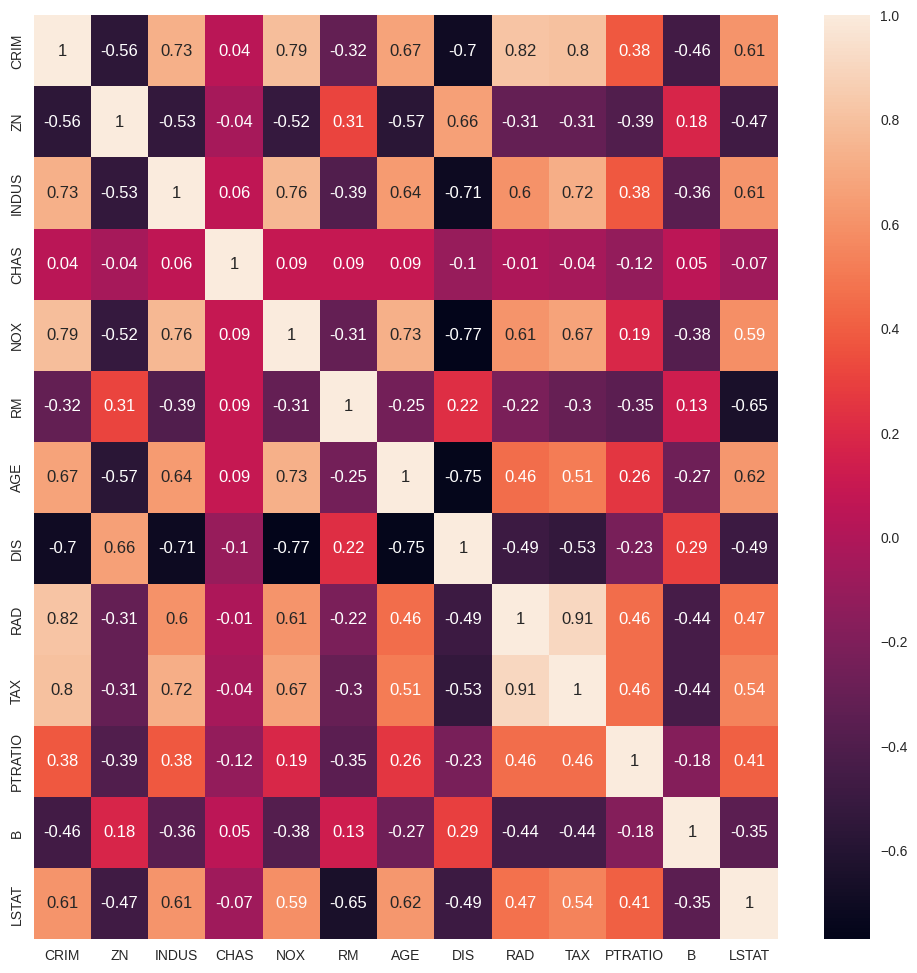

In [38]:
# tính tương quan sử dụng corr của pandas
# làm tròn tới chữ số thập phân thứ 2
correlation_matrix = boston[name].corr().round(2)

## Yêu cầu 17: vẽ biểu đồ ma trận tương quan sử dụng seaborn
# annot = True để in các giá trị tương quan
# trong dấu ngoặc vuông

## VIẾT CODE Ở ĐÂY:
figure = plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot= True)

<details><summary> Gợi ý </summary>

[heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

</details>

Trục x và y của heatmap có các biến của dataframe boston house. Mỗi ô vuông chỉ ra giá trị tương quan giữa 2 biến đó. Ví dụ: LSTAT và CRIM ở dưới cùng bên trái của heatmap có tương quan là 0.46; 2 biến này không có tính tương quan cao.

Thay vào đó, các biến RAD và TAX (hãy thử và tìm chúng trong biểu đồ) có tương quan là 0.91; các biến này có tính tương quan cao. Tương tự với các biến NOX và DIS có tương quan là -0.71.

Hãy xem chúng trông như thế nào trong biểu đồ phân tán.

Text(0.5, 31.999999999999986, 'RAD')

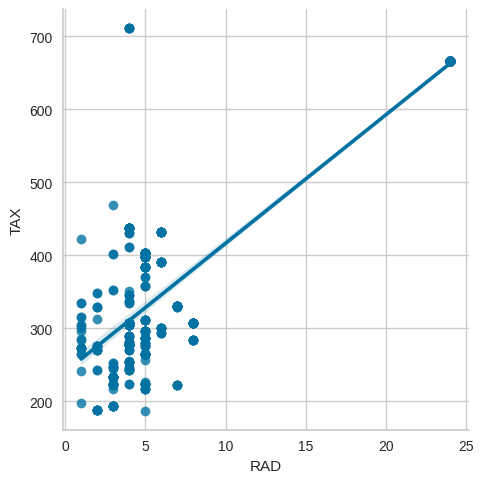

In [40]:
## Yêu cầu 18: tương quan giữa RAD (chỉ số khả năng tiếp cận cao tốc hướng tâm)
# và TAX (tỷ lệ thuế tài sản toàn giá trị trên mỗi 10,000 USD)

## VIẾT CODE Ở ĐÂY:
sns.lmplot(x='RAD', y ='TAX', data=boston, order=1)
plt.ylabel('TAX')
plt.xlabel('RAD')

Text(0.5, 31.999999999999986, 'NOX')

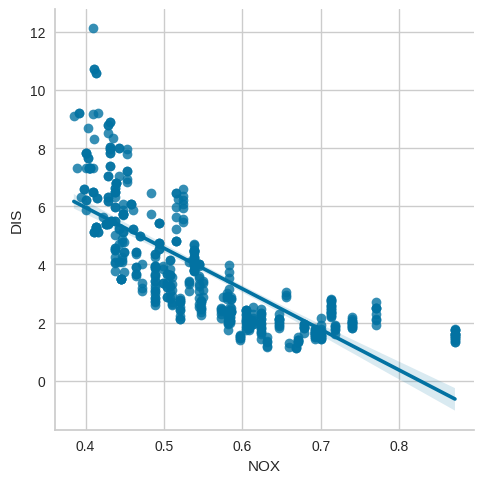

In [41]:
## Yêu cầu 19: và NOX (nồng độ oxit nitric (phần trên 10 triệu))
# và DIS (khoảng cách có trọng số đến 5 trung tâm việc làm Boston)
sns.lmplot(x='NOX', y ='DIS', data=boston, order=1)
plt.ylabel('DIS')
plt.xlabel('NOX')

Tương quan hoặc cộng tuyến giữa NOX và DIS khá rõ ràng trong biểu đồ phân tán ở trên, do đó, các biến này đang vi phạm giả định không có đa cộng tuyến.

Chúng ta sẽ xóa 1 trong 2 khỏi tập dữ liệu trước khi huấn luyện mô hình tuyến tính.